# **Importing all the Libraries**

In [1]:
#Importing libraries required for the case study and to plot charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

In [2]:
loan_df = pd.read_csv("loan.csv",dtype=object)

In [3]:
loan_df.shape
loan_df.info()
loan_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object

# **EDA**

# **Data Cleaning and Manipulation**

In [4]:
# Finding out columns which have all null values

loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# Removing columns with only null values as they offer no analytical value.
# The dataset has null values in 53 to 105 index of columns
loan_df.drop(loan_df.iloc[:,53:105],inplace=True,axis=1)

In [6]:
loan_df.shape

(39717, 59)

In [7]:
# Now, removing other columns which are not required in the analysis
col_drop_l1=["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan_df.drop(labels=col_drop_l1,axis=1,inplace=True)

col_drop_l2=["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan_df.drop(labels=col_drop_l2,axis=1,inplace=True)

col_drop_l3=["member_id","url","emp_title","zip_code","tax_liens"]
loan_df.drop(labels=col_drop_l3,axis=1,inplace=True)

In [8]:
loan_df.shape
loan_df.info()
loan_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          39717 non-null  object
 1   loan_amnt                   39717 non-null  object
 2   funded_amnt                 39717 non-null  object
 3   funded_amnt_inv             39717 non-null  object
 4   term                        39717 non-null  object
 5   int_rate                    39717 non-null  object
 6   installment                 39717 non-null  object
 7   grade                       39717 non-null  object
 8   sub_grade                   39717 non-null  object
 9   emp_length                  38642 non-null  object
 10  home_ownership              39717 non-null  object
 11  annual_inc                  39717 non-null  object
 12  verification_status         39717 non-null  object
 13  issue_d                     39717 non-null  ob

id                            object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
term                          object
int_rate                      object
installment                   object
grade                         object
sub_grade                     object
emp_length                    object
home_ownership                object
annual_inc                    object
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
addr_state                    object
dti                           object
delinq_2yrs                   object
earliest_cr_line              object
inq_last_6mths                object
open_acc                      object
pub_rec                       object
revol_bal                     object
revol_util                    object
t

In [9]:
# Isolating numerical values from the 'emp_length' column signifying employee tenure
loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,162.87,B,B2,10,...,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27%,59.83,C,C4,1,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400,36 months,15.96%,84.33,C,C5,10,...,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000,36 months,13.49%,339.31,C,C1,10,...,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
4,1075358,3000,3000,3000,60 months,12.69%,67.79,B,B5,1,...,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0


In [10]:
loan_df.isnull().sum()

id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
title                          11
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     50
total_acc                       0
initial_list_status             0
out_prncp     

In [11]:
# cleaning the 'pub_rec_bankruptcies' column for upcoming analysis.
loan_df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
loan_df.pub_rec_bankruptcies.isnull().sum()

0

In [12]:
# Removing % signs from the interest rate and revol_util column to prepare the data for analysis
loan_df.int_rate=loan_df.int_rate.str.rstrip('%')
loan_df.revol_util=loan_df.revol_util.str.rstrip('%')

In [13]:
# Converting amount columns into numerical format to facilitate data modeling and visualization.
columns1=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_df[columns1]=loan_df[columns1].apply(pd.to_numeric)

In [14]:
loan_df.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_

# **Dropping the current customers**

In [15]:
# Excluding current customers as they are not required for driving factors consideration.
loan_df = loan_df[loan_df.loan_status != "Current"]

In [16]:
loan_df.shape

(38577, 45)

In [17]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  object 
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term                        38577 non-null  object 
 5   int_rate                    38577 non-null  float64
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_length                  38577 non-null  int64  
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  issue_d                     38577 no

In [18]:
# Delete rows containing NaN Values
# Assuming > or = 50%
perc = 50.0
min_count =  int(((100-perc)/100)*loan_df.shape[1] + 1)
min_count

23

In [19]:
mod_df = loan_df.dropna( axis=0, thresh=min_count)
mod_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,0,0,0,Jan-15,161.03,Jan-16,0,1,INDIVIDUAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,...,0,0,0,Jul-10,80.9,Jun-10,NaN,1,INDIVIDUAL,Not Known
39713,90665,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,...,0,0,0,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,Not Known
39714,90395,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,...,0,0,0,Apr-08,0,Jun-07,NaN,1,INDIVIDUAL,Not Known
39715,90376,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,...,0,0,0,Jan-08,0,Jun-07,NaN,1,INDIVIDUAL,Not Known


In [20]:
# Finding out percentages of various loan_status out of total loans issued
loan_df = mod_df
(loan_df.loan_status.value_counts()*100)/len(loan_df)

loan_status
Fully Paid     85.413588
Charged Off    14.586412
Name: count, dtype: float64

In [21]:
#Finding out percentages of various purpose of loans out of total loans issued

(loan_df.purpose.value_counts()*100)/len(loan_df)

purpose
debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: count, dtype: float64

# **Finding outliers and removing**

* Fixing Anual income

<Axes: >

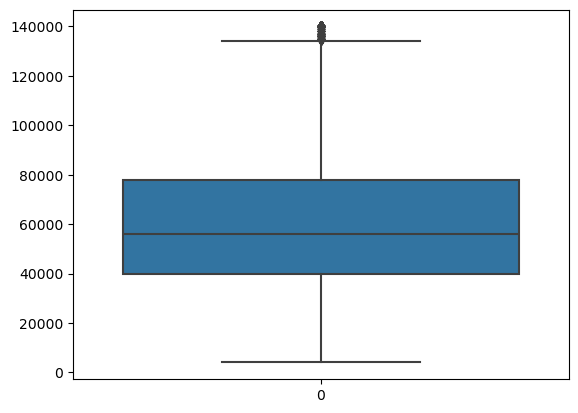

In [65]:
sns.boxplot(loan_df.annual_inc)

In [23]:
quant_annual_inc = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_annual_inc

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

* A higher percentile threshold will capture more extreme data points as outliers. In this case, the 95th percentile captures the data point at 234144 as an outlier.
* A lower percentile threshold will capture fewer data points as outliers, but there's a risk of keeping outliers in the data.

In [24]:
# Removing outliers i.e. quantile 0.95 from annual income 

loan_df=loan_df[loan_df["annual_inc"]< loan_df["annual_inc"].quantile(0.95)]
loan_df["annual_inc"].describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

<Axes: >

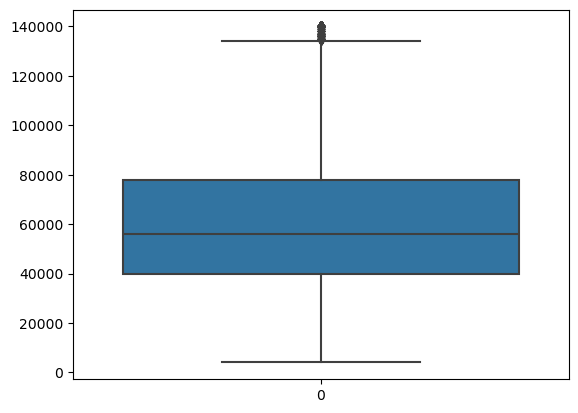

In [66]:
sns.boxplot(loan_df.annual_inc)

Outliers are removed that are above quantile 0.95

* Fixing loan amount

In [26]:
loan_df['loan_amnt'].describe()

count    36642.000000
mean     10681.045658
std       7047.619569
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [27]:
quant_loan_amnt = loan_df["loan_amnt"].quantile([0.5, 0.75,0.90, 0.95])
quant_loan_amnt

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
Name: loan_amnt, dtype: float64

<Axes: >

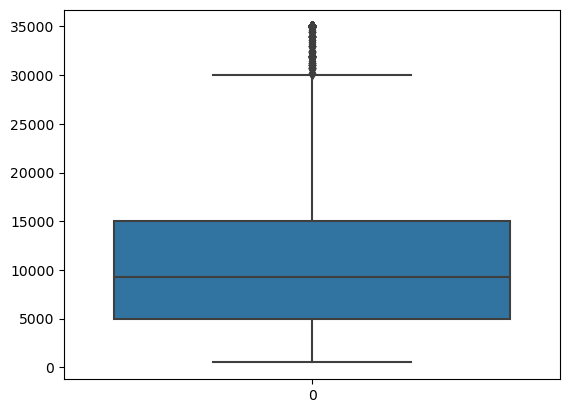

In [67]:
# Ploting Box Plot for loan amount
sns.boxplot(loan_df.loan_amnt)

Loan amount seems to be ok.

* Fixing total payment

In [29]:
quant_total_pymnt = loan_df["total_pymnt"].quantile([0.25, 0.5, 0.75,0.95])
quant_total_pymnt

0.25     5413.353366
0.50     9367.652235
0.75    15458.570902
0.95    28540.943201
Name: total_pymnt, dtype: float64

<Axes: >

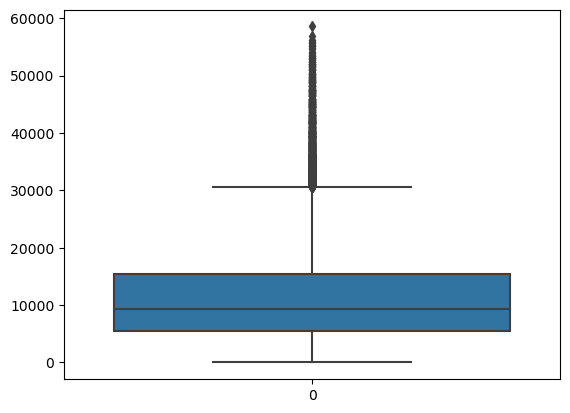

In [68]:
# Ploting Boxplot for Total Payment
sns.boxplot(loan_df.total_pymnt)

* Interest rate

<Axes: >

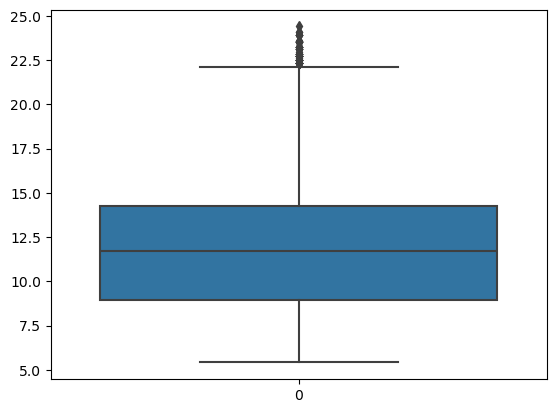

In [69]:
# Ploting Boxplot for Interest Rate
sns.boxplot(loan_df.int_rate)

# **Removing other data which is not required**

In [32]:
column_drop1=["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
loan_df.drop(labels=column_drop1,axis=1,inplace=True)
loan_df.shape

(36642, 40)

In [33]:
loan_df.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    48
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

# **Univariate Analysis**

* ##### **Univariate Analysis for Loan Amount Variable**

In [34]:
# Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]

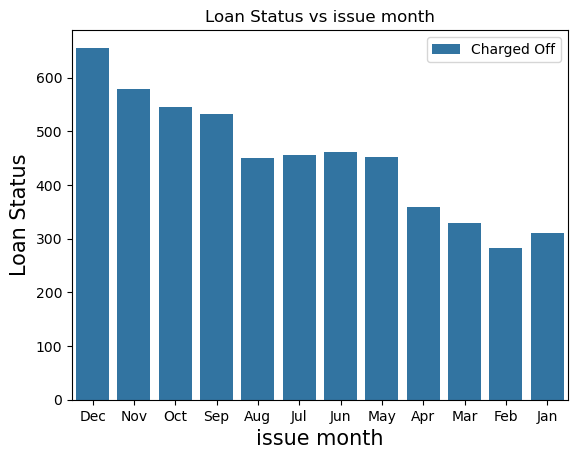

In [64]:
ax = sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'],hue='loan_status')
ax.set(title='Loan Status vs issue month')
ax.set_xlabel('issue month',fontsize=15)
ax.set_ylabel('Loan Status',fontsize=15)      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

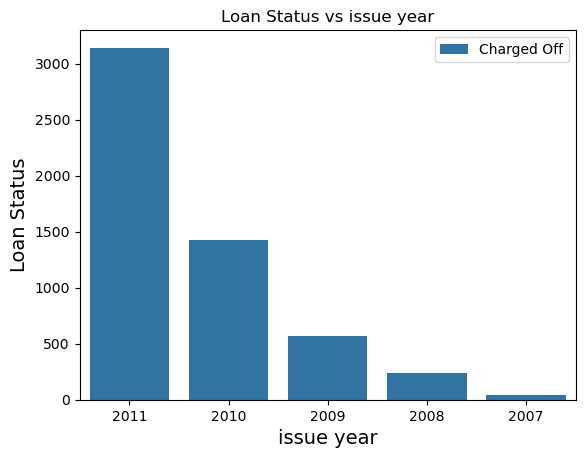

In [36]:
ax = sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'],hue='loan_status')
ax.set(title='Loan Status vs issue year')
ax.set_xlabel('issue year',fontsize=14)
ax.set_ylabel('Loan Status',fontsize=14)      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

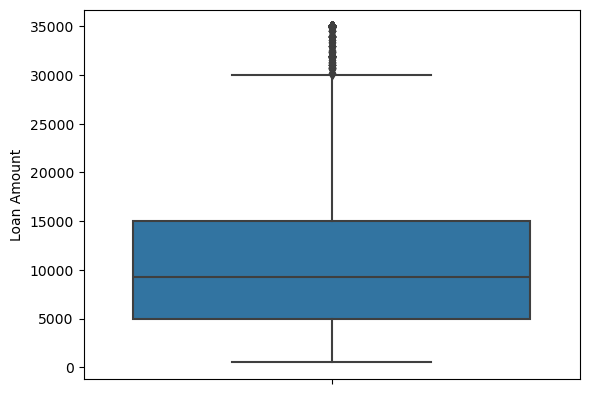

In [37]:
ax=sns.boxplot(y=loan_df['loan_amnt'])
ax.set_ylabel('Loan Amount', fontsize=10)
plt.show()

* ###### **Observations** :
 1. Majority of the loans fall within the range of 5000 to 15000

Text(0.5, 0, 'Loan Amount')

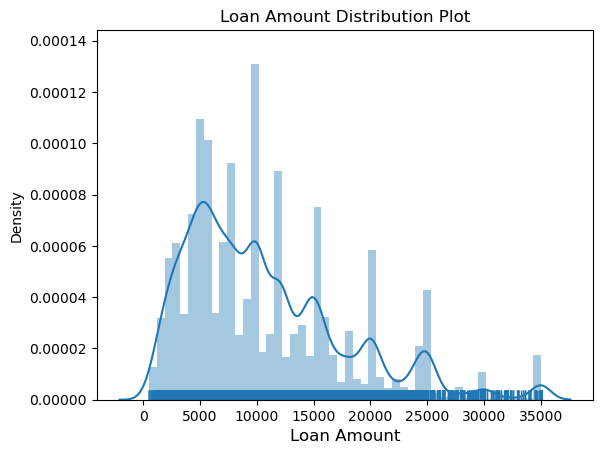

In [38]:
ax=sns.distplot(loan_df['loan_amnt'],rug=True)
ax.set(title='Loan Amount Distribution Plot')
ax.set_xlabel('Loan Amount', fontsize=12)

* ##### **Univariate Analysis for Interest rates Variable**

Text(0, 0.5, 'Interest Rate')

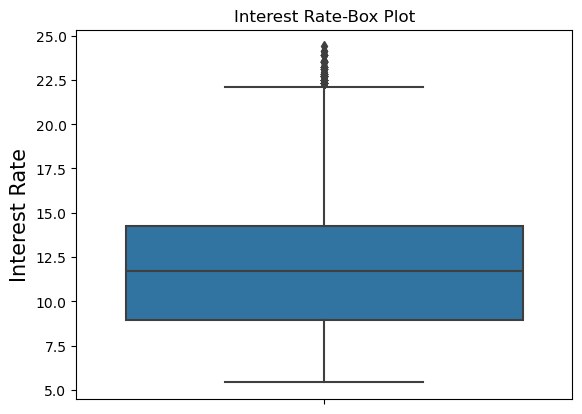

In [39]:
ax=sns.boxplot(y=loan_df['int_rate'])
ax.set(title='Interest Rate-Box Plot')
ax.set_ylabel('Interest Rate',fontsize=15)

* ###### **Observations** -
 1. Majority of the interest rates are in the range 10%-15%

Text(0.5, 0, 'Interest Rate')

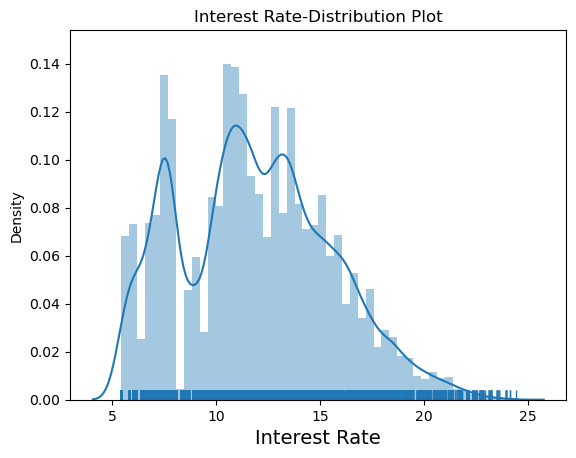

In [40]:
ax=sns.distplot(loan_df['int_rate'],rug=True)
ax.set(title='Interest Rate-Distribution Plot')
ax.set_xlabel('Interest Rate',fontsize=14)

* ##### **Univariate Analysis for Annual Income Variable**

Text(0, 0.5, 'Annual Income')

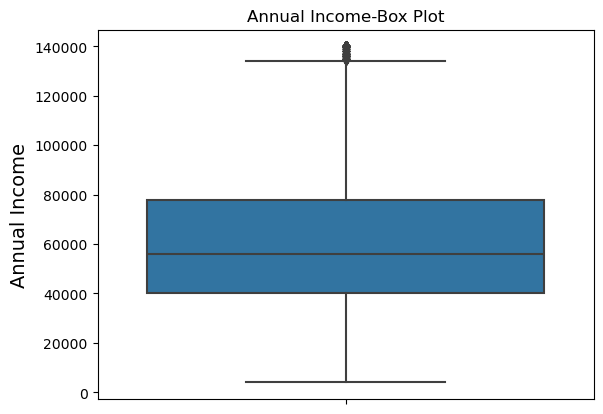

In [41]:
ax=sns.boxplot(y=loan_df['annual_inc'])
ax.set(title='Annual Income-Box Plot')
ax.set_ylabel('Annual Income',fontsize=14)


* ###### **Observations** -
 1. Majority of the Annual Income are in the range 25000-75000

Text(0.5, 0, 'Annual Income')

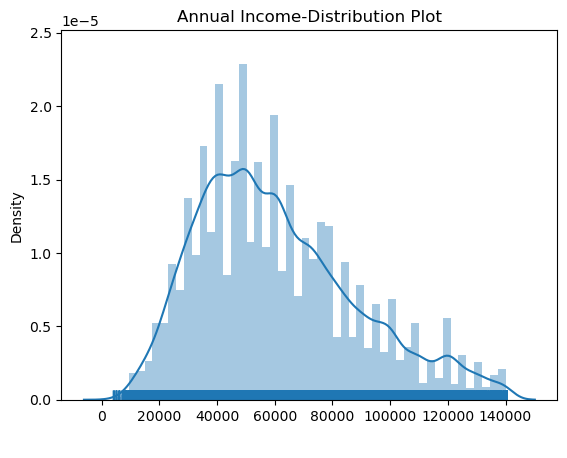

In [42]:
ax=sns.distplot(loan_df['annual_inc'],rug=True)
ax.set(title='Annual Income-Distribution Plot')
ax.set_xlabel('Annual Income',fontsize=14,color='w')

* ##### **Univariate Analysis - Unordered Categorical Variable - Home Ownership**

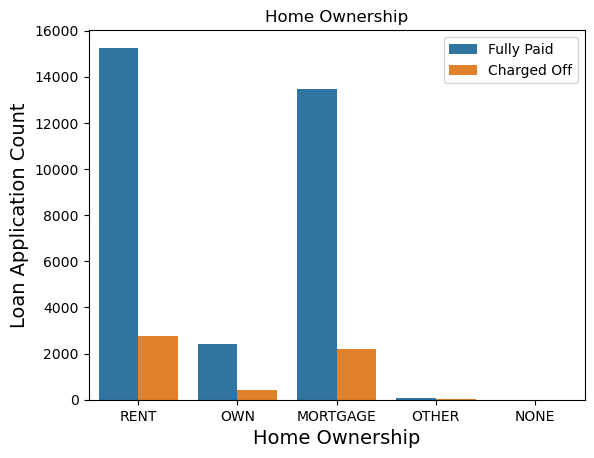

In [70]:
ax=sns.countplot(x="home_ownership",data=loan_df,hue='loan_status')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

A high number of applicants live in rented or mortgaged homes, which contributes to the high number of fully paid as well as charged off.

* ##### **Univariate Analysis - Unordered Categorical Variables - Purpose of Loan**

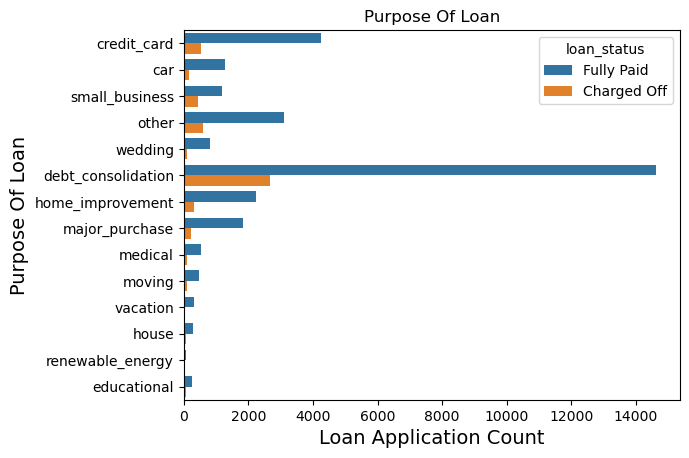

In [71]:
ax=sns.countplot(y="purpose",data=loan_df,hue='loan_status')
ax.set(title='Purpose Of Loan')
ax.set_ylabel('Purpose Of Loan',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)
plt.show()

The count plot reveals that debt consolidation and credit card bills were the primary reasons for taking out loans, and there's also a high number of charged-off accounts for these loans.

# **Bivariate Analysis**

* ##### **Bivariate analysis on interest rate against**

In [45]:
loan_df['interest_rate_categories']=pd.cut(loan_df['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','13-16','16+'])
interest_vs_loan = loan_df.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['ChargedOff_Proportion'] = interest_vs_loan['Charged Off']/interest_vs_loan['Total']
interest_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,interest_rate_categories,Charged Off,Fully Paid,Total,ChargedOff_Proportion
3,16+,1191,3129,4320,0.275694
2,13-16,1951,8974,10925,0.178581
1,10-13,1194,7709,8903,0.134112
0,0-10,812,11009,11821,0.068691


Text(0, 0.5, 'Charged Off Proportion')

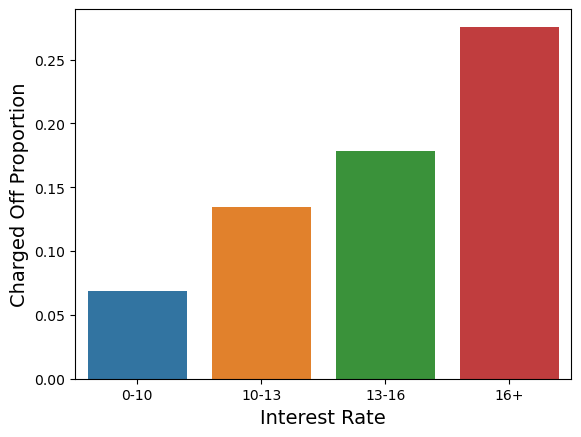

In [72]:
ax1.set(title='Interest Rates vs ChargedOff Proportion')
ax1=sns.barplot(x='interest_rate_categories',y='ChargedOff_Proportion',data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Charged Off Proportion',fontsize=14)

  * ###### **Observations** -
1. Interest rates below 10% have a very low chance of being charged off.
2. 16% showing high interest rate

* ##### **Bivariate analysis on employment length vs Charged Off Proportion**

In [47]:
emplen_vs_loan = loan_df.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid']
emplen_vs_loan['ChargedOff_Proportion'] = emplen_vs_loan['Charged Off']/emplen_vs_loan['Total']
emplen_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)


loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,0,225,789,1014,0.221893
10,10,1269,6615,7884,0.160959
7,7,252,1391,1643,0.153378
5,5,441,2603,3044,0.144875
8,8,194,1147,1341,0.144668
1,1,1066,6304,7370,0.144640
6,6,294,1779,2073,0.141823
3,3,536,3287,3823,0.140204
4,4,443,2754,3197,0.138567
2,2,547,3554,4101,0.133382


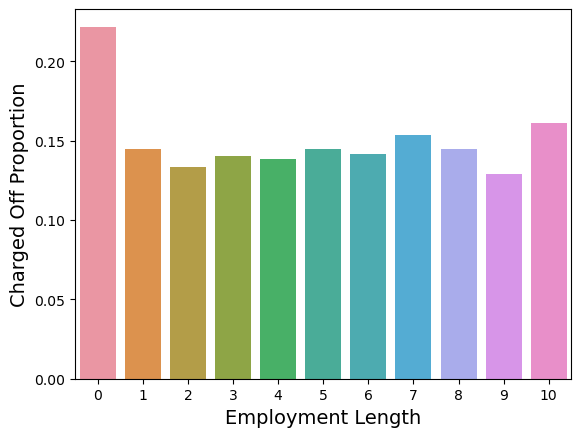

In [73]:
ax1.set(title='Employment Length vs Charged Off Proportion')
ax1=sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Charged Off Proportion',fontsize=14)
plt.show()

Applicants with less than a year of work experience are more likely to have a charge-off due to limited income to repay the loan. The rest of the applicants have a similar chance of being charged off.

* ##### **Bivariate Analysis on annual income on Charged Off Loans**

In [49]:
loan_df['annual_inc_categories']=pd.cut(loan_df['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])
inc_range_vs_loan = loan_df.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000+,912,7148,8060,0.113151


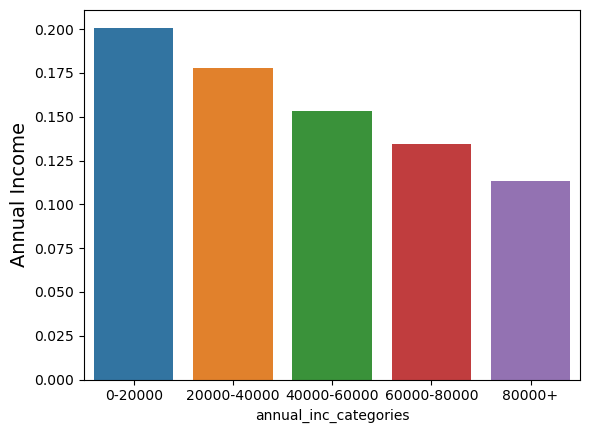

In [74]:
ax1.set(title='Annual Income Vs. Charged Proportion')
ax1=sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=inc_range_vs_loan)
ax.set_xlabel('Charged Off Proportion',fontsize=14)
ax1.set_ylabel('Annual Income',fontsize=14)
plt.show()

1. Income range 80000+ has a higher creditworthiness, resulting in a lower chance of charge-off.
2. There is a direct relationship between annual income and creditworthiness. Borrowers with higher income typically have a lower likelihood of having debt charged off.
3. Income range 0-20000 has a lower creditworthiness, leading to a higher chance of charge-off.


* ##### **Bivariate analysis on pub_rec_bankruptcies against ChargedOff Proportion**


In [51]:
bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['ChargedOff_Proportion'] = bankruptcies_vs_loan['Charged Off']/bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('ChargedOff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,2,2,3,5,0.400000
1,1,361,1238,1599,0.225766
3,Not Known,112,546,658,0.170213
0,0,4941,29439,34380,0.143717


Text(0, 0.5, 'Chargedoff Proportion')

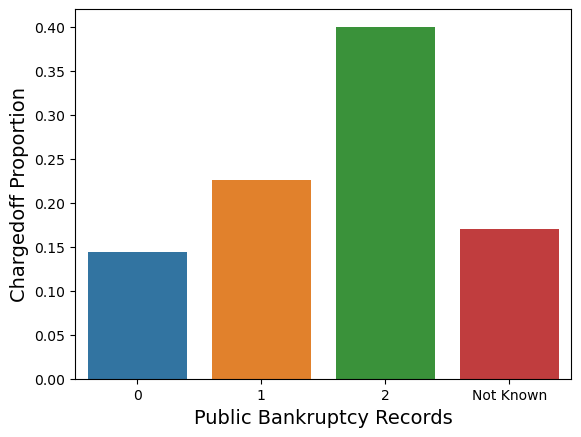

In [75]:
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=14)
ax1=sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)

1. Borrowers with a record of bankruptcy (pub_rec_bankruptcies = 1) have a higher charged-off proportion than those with no record of bankruptcy.
2. Borrowers with a record of two bankruptcies (pub_rec_bankruptcies = 2) have an even higher charged-off proportion, but the sample size is too small to be statistically significant.

* ##### **Bivariate analysis of grade against Charged Off Proportion**

In [53]:
grade_vs_loan=loan_df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
6,G,95,166,261,0.363985
5,F,289,597,886,0.326185
4,E,659,1786,2445,0.269530
3,D,1080,3754,4834,0.223417
2,C,1324,6153,7477,0.177076
1,B,1376,9720,11096,0.124009
0,A,593,9050,9643,0.061495


Text(0, 0.5, 'Charged Off Proportion')

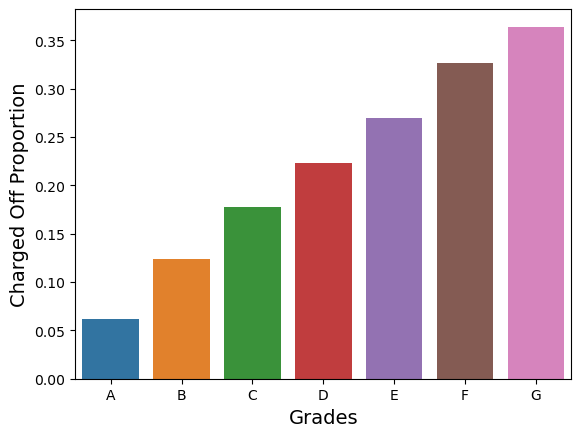

In [76]:
ax1.set(title='Grades vs Charged Off Proportion')
ax1=sns.barplot(x='grade',y='ChargedOff_Proportion',data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Charged Off Proportion',fontsize=14)

1. Borrowers with a Grade A rating have the lowest risk of default.
2. Borrowers with Grade F or G ratings have a high risk of default.
3. The risk of default increases as the creditworthiness grade decreases (A to G).

* ##### **Bivariate Analysis Purpose of Loan Vs Loan amount**

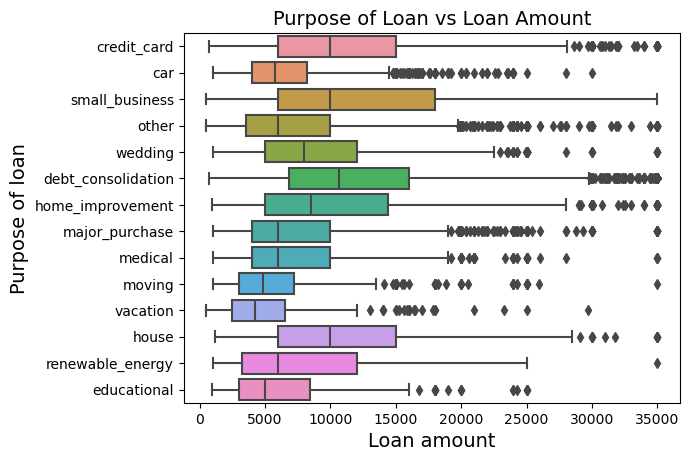

In [77]:
ax=sns.boxplot(y='purpose',x='loan_amnt',data=loan_df)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=14)
ax.set_xlabel('Loan amount',fontsize=14)
ax.set_ylabel('Purpose of loan',fontsize=14)
plt.show()

Among loan purposes, small businesses have the highest median, 95th percentile, and 75th percentile loan amounts. Debt consolidation follows in second place, and credit cards come in third.

* ##### **Bivariate Analysis Purpose of Loan Vs Interest rates**

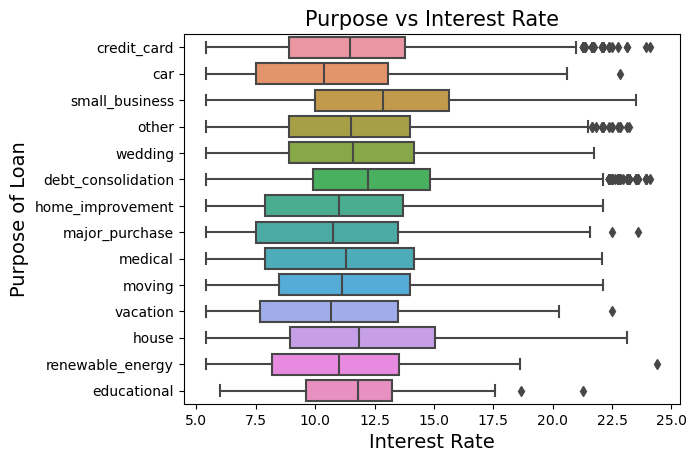

In [78]:
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_df)
ax.set_title('Purpose vs Interest Rate',fontsize=15)
ax.set_xlabel('Interest Rate',fontsize=14)
ax.set_ylabel('Purpose of Loan',fontsize=14)
plt.show()

1. Compared to other loan types, small business loans often carry higher interest rates.
2. Debt consolidation loans come in second for having high interest rates.

# **Multivariate Analysis**

* #### To visualize relationships between variables by loan status, lets construct a pair plot.

In [57]:
# Taking a small slice of important data from the main set to analyze

loan_multivariate_df = loan_df[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']].copy()

# As they are heavily skewed we take the log of below variables
loan_multivariate_df['loan_amnt'] = np.log10(loan_multivariate_df['loan_amnt'])
loan_multivariate_df['annual_inc'] = np.log10(loan_multivariate_df['annual_inc'])
loan_multivariate_df['int_rate'] = np.log10(loan_multivariate_df['int_rate'])


In [58]:
loan_multivariate_df.head()

,loan_amnt,annual_inc,issue_year,int_rate,loan_status
0,3.698970,4.380211,2011,1.027350,Fully Paid
1,3.397940,4.477121,2011,1.183839,Charged Off
2,3.380211,4.088207,2011,1.203033,Fully Paid
3,4.000000,4.691965,2011,1.130012,Fully Paid
5,3.698970,4.556303,2011,0.897627,Fully Paid


 * ##### Since the majority of loan status statistics were discovered in 2011, let's use that year for our analysis.

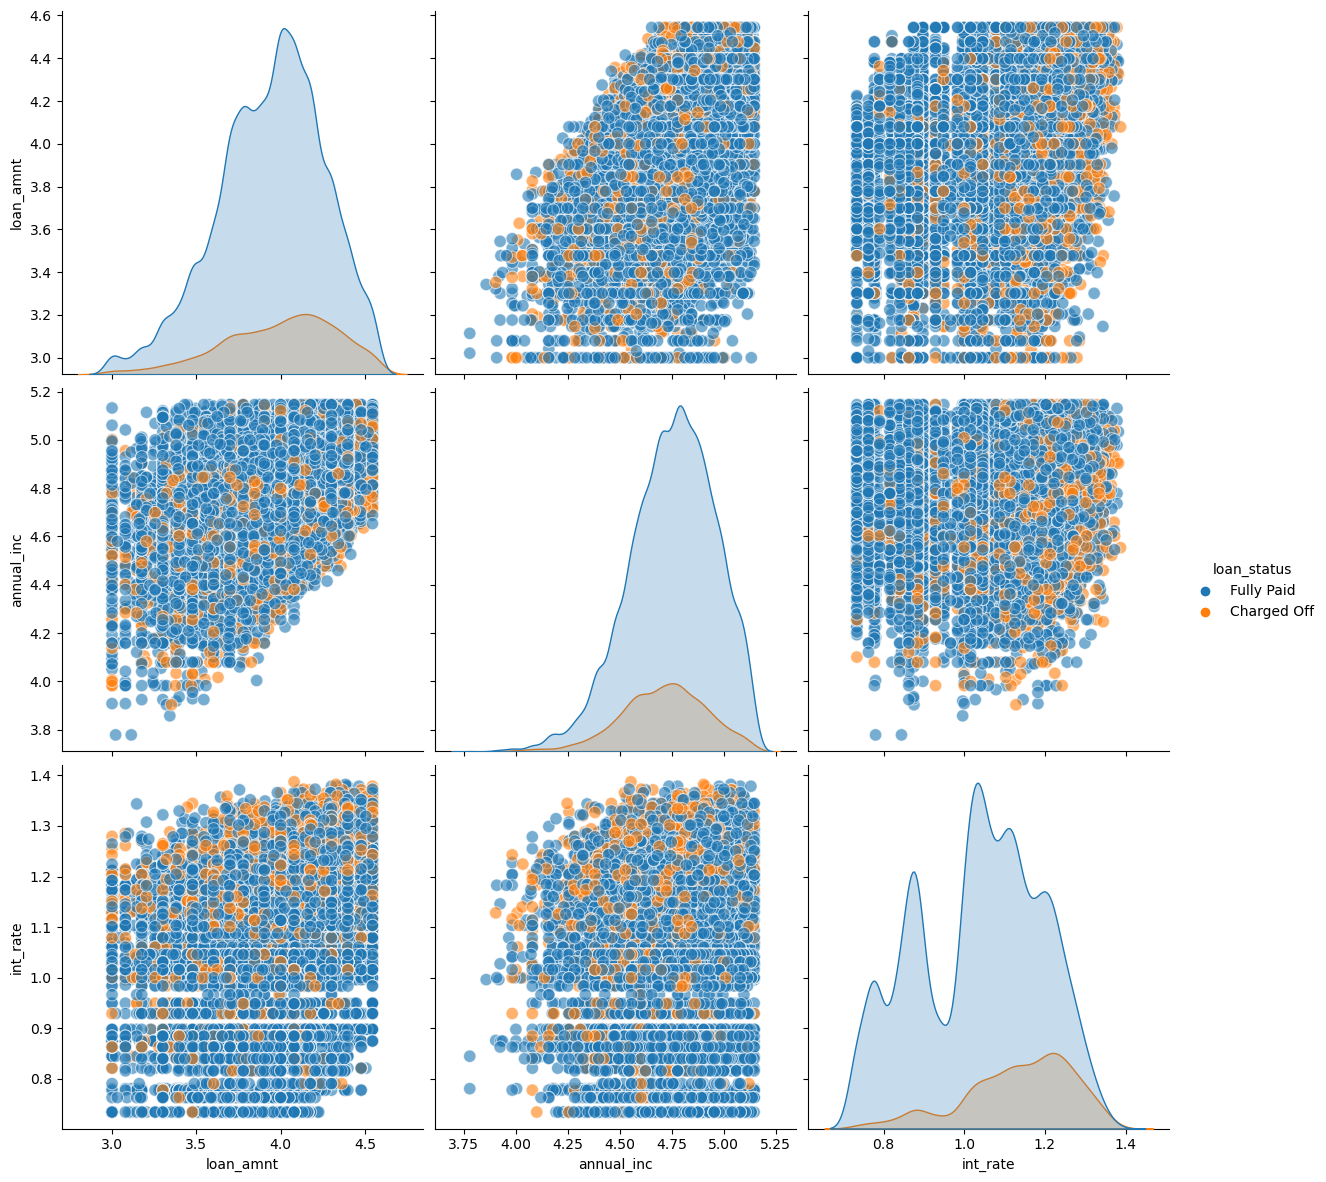

In [59]:
sns.pairplot(loan_multivariate_df[loan_multivariate_df['issue_year'] == "2011"], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status',
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80}, 
             size = 4);

1. Loans with high interest rates see more defaults (charged off)
2. People with higher income can qualify for slightly larger loans
3. Rising interest rates lead to more loans being defaulted on

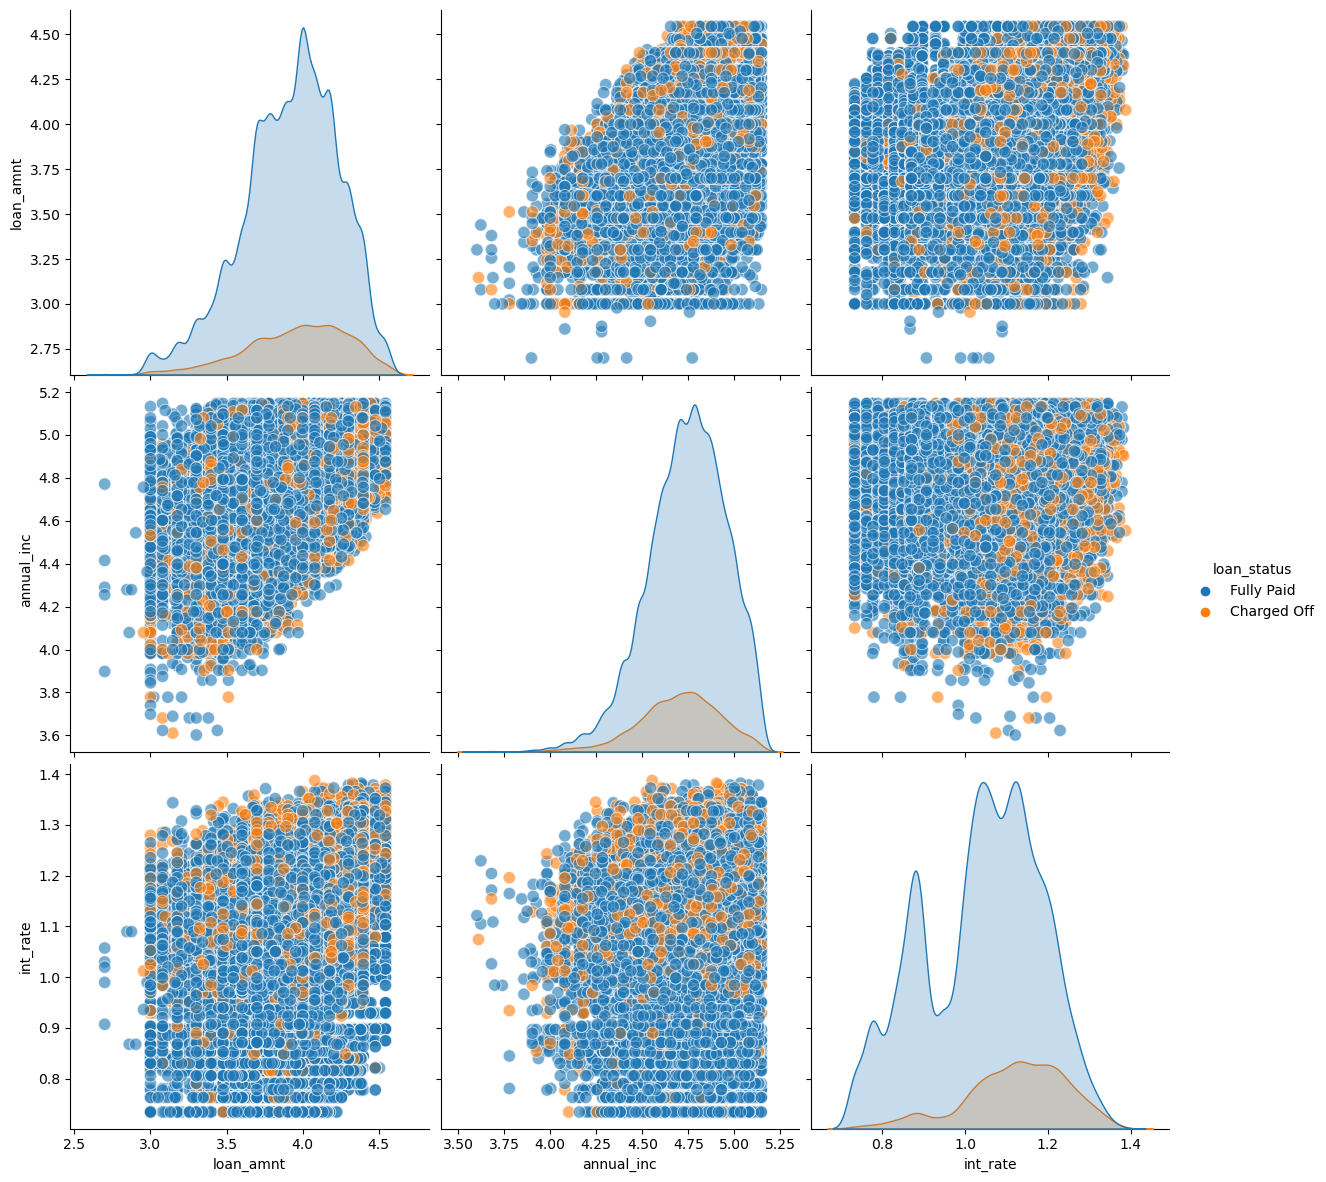

In [60]:
sns.pairplot(loan_multivariate_df, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80,},
             size = 4)
plt.show()

1. Loans with higher interest rates are more likely to be unpaid
2. Yearly, there is an increase in number of charged off
3. Slightly Higher the loan amount for a higher the annual income
4.  With increase in loan amount there is an increase in intrest rate